In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)   # Change the size of plots

import pandas as pd

import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='LJQX8580YS8GDLSL', output_format='pandas')


Populating the interactive namespace from numpy and matplotlib


In [ ]:
ticker = 'DIA'
stock, meta_data = ts.get_intraday(symbol=ticker,interval='60min', outputsize='full')
meta_data
stock.index = pd.to_datetime(stock.index)
stock


{'1. Information': 'Intraday (60min) prices and volumes',
 '2. Symbol': 'DIA',
 '3. Last Refreshed': '2018-04-19 12:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

Text(0.5,1,'DIA')

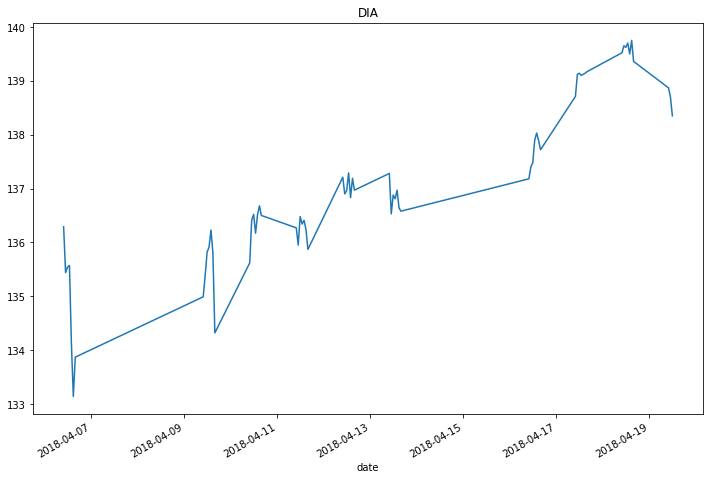

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2018-04-18 15:00:00,247.33,247.88,247.14,247.74,32494.0
2018-04-18 16:00:00,247.64,247.85,247.37,247.38,83472.0
2018-04-19 10:00:00,246.82,247.18,246.25,246.71,60794.0
2018-04-19 11:00:00,246.65,247.55,246.42,247.12,52902.0
2018-04-19 12:00:00,246.98,247.08,246.25,246.25,43795.0


In [25]:

stock['4. close'].plot()
plt.title(ticker)
plt.show();
data.tail()


### daily

{'1. Information': 'Intraday (60min) prices and volumes',
 '2. Symbol': 'DIA',
 '3. Last Refreshed': '2018-04-19 12:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

Text(0.5,1,'DIA daily close')

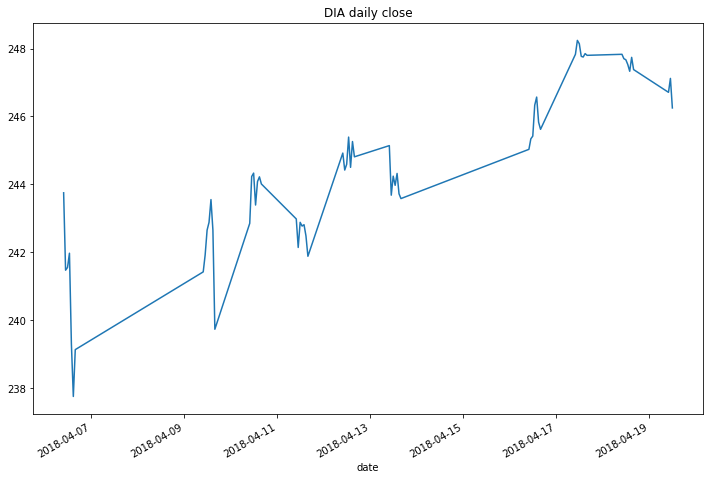

count     66.000000
mean     244.486227
std        2.444213
min      237.750000
25%      242.857500
50%      244.325000
75%      246.510000
max      248.240000
Name: 4. close, dtype: float64

2018-04-06    239.13
2018-04-09    239.73
2018-04-10    244.01
2018-04-11    241.88
2018-04-12    244.81
2018-04-13    243.58
2018-04-16    245.62
2018-04-17    247.80
2018-04-18    247.38
2018-04-19    246.25
Name: 4. close, dtype: float64

In [40]:
stock, meta_data = ts.get_intraday(symbol=ticker,interval='60min', outputsize='full')
# group by date sliced to day
grouped = stock.groupby(lambda x: x[0:10], axis=0)
meta_data
stock.index = pd.to_datetime(stock.index)
stock['4. close'].plot();
plt.title(ticker + ' daily close')
plt.show();
stock['4. close'].describe().transpose()
grouped['4. close'].last()


In [6]:
ticker = 'DIA'
stock = ts.get_daily_adjusted(symbol=ticker,outputsize='full')
stock

(            1. open   2. high   3. low  4. close  5. adjusted close  \
 date                                                                  
 2000-01-03   116.03  116.0300  113.000    113.50            75.1629   
 2000-01-04   112.30  113.0000  109.800    109.80            72.7126   
 2000-01-05   110.00  112.0000  109.000    111.80            74.0371   
 2000-01-06   111.40  113.2000  111.200    111.80            74.0371   
 2000-01-07   113.30  115.6000  113.200    115.50            76.4873   
 2000-01-10   116.80  116.8000  115.400    116.00            76.8184   
 2000-01-11   115.20  116.8000  115.000    115.10            76.2224   
 2000-01-12   115.50  116.2000  115.200    115.40            76.4211   
 2000-01-13   116.00  116.6000  115.200    115.90            76.7522   
 2000-01-14   117.50  117.5000  116.100    117.50            77.8118   
 2000-01-18   116.40  116.9000  115.500    115.70            76.6198   
 2000-01-19   115.60  115.8000  114.600    115.60            76.

### plot

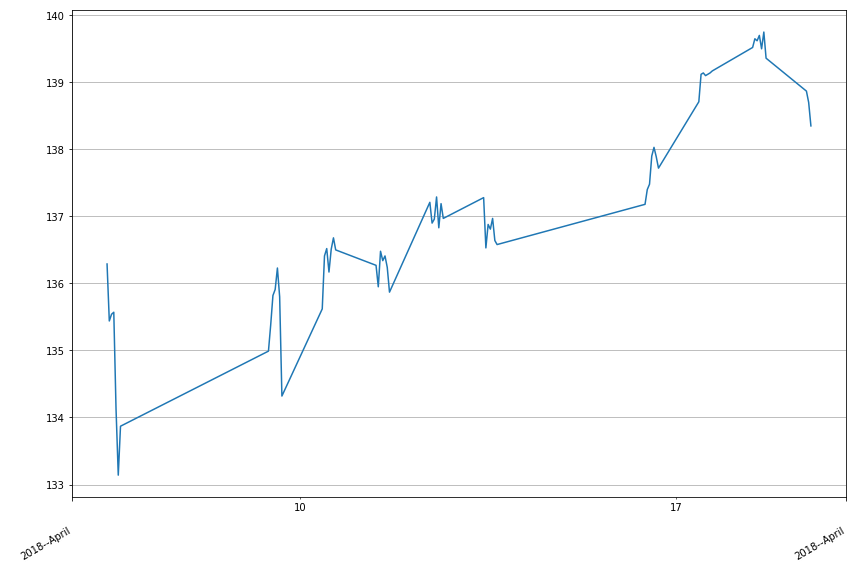

In [24]:

fig, ax = plt.subplots()
ax.plot_date(stock.index, stock['4. close'],'-')


# Major Axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y--%B'))

# Minor Axis
ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout();
plt.show();
